# What is PCA?

#### PCA is used to **identify patterns in data** and used to **compress data** without much loss of information.

#### In this Notebook we will find patterns in 2-D data and represent it in 1-D(Thereby compressing it)

#### Look at the Figure below:

<img src="1.png">

#### In figure 1, we represent the blue points in 2 co-ordinates. But there is pattern in the data,They actually lie on a same line!(**Identifying pattern in the data**)

#### So we draw an imaginary line( **The grey line** ) through the blue points

#### From the prespective of the grey line,wouldnt we be able to represent all the blue points in only one co-ordinate?(**Compression**). This is shown in Figure 2

In [2]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare Sample Data 

In [3]:

#This is the sample 2 dimensional data we are going to reduce

x = np.matrix([2.5,0.5,2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1  ])

y = np.matrix([2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9])
original_data = np.r_[x,y]

Text(0,0.5,'Y')

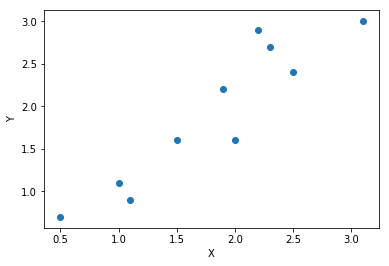

In [4]:
#Plotting X and Y values 
plt.scatter([x],[y])
plt.xlabel("X")
plt.ylabel("Y")

#### PLOT A

In the figure above,the blue points are not perfectly on a line but there is a linear pattern in the data. We can draw an imaginary line in such a way such that it passes **close** to blue points.


Find mean of x and y. Then substract the means from all the values.

This is done to center the data around the origin

In [5]:
mean_x = np.mean(x)
mean_y = np.mean(y)

x = x-mean_x
y = y-mean_y

Text(0,0.5,'Y')

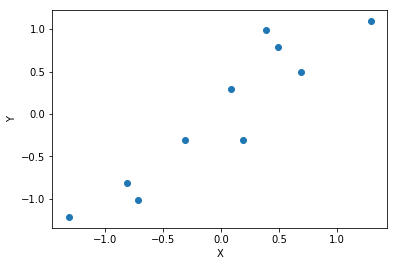

In [6]:
#Plotting X and Y values 
plt.scatter([x],[y])
plt.xlabel("X")
plt.ylabel("Y")

#### PLOT B

Notice the data pattern in the plot above

Right now,each blue point is represented by its two(X and Y) co-ordinates.
We are going to try to represent these blue points in one co-ordinate


# Calculate the Covariance Matrix 

In [7]:
#Calculation the covariance matrix of X and Y
data = np.r_[x,y]
cov = np.matmul(data,data.T)/(10-1)
print(cov)

[[ 0.61655556  0.61544444]
 [ 0.61544444  0.71655556]]


The diagonal values of the covariance matrix represent the variances of X and Y.

The non-diagonal values are the same and represent the covariance between X and Y.

As the non-diagonal values are positive,it means that if we increase X by some amount,the value of Y will also increase

# Calculating the eigen values and eigen vectors of the covariance matrix

In [8]:
evals,evecs = np.linalg.eig(cov)

In [9]:
#Flipping so that the eigvals are arranged in descending order
evecs = np.flip(evecs,1)
evals = np.flipud(evals)

Eigenvectors of symmetric matrics(Covariance matrix is always a symmetric matrix) are perpendicular to each other.(Dot product is zero)


In [10]:
print(np.dot(evecs[:,0].T,evecs[:,1]))

[[ 0.]]


(-1.6173930421976976,
 1.6173930421976976,
 -1.6173930421976976,
 1.6173930421976976)

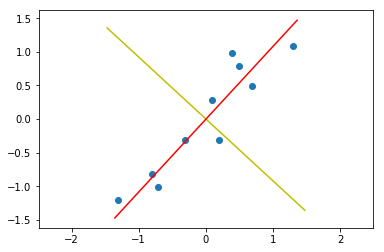

In [11]:
#Plotting the eigen vectors along with the data
#The eigen vectors are not to scale
plt.scatter([x],[y])
plt.plot([-evecs[0,1]*2,evecs[0,1]*2],[-evecs[1,1]*2,evecs[1,1]*2],'Y')
plt.plot([-evecs[0,0]*2,evecs[0,0]*2],[-evecs[1,0]*2,evecs[1,0]*2],'R')
plt.axis('equal')

#### PLOT C

We have plotted the eigen vectors along with the data.

Notice that the imaginary line we talked about before is the** eigen vector** (Red line) with the **highest eigen value**!

The second eigenvector gives us the other, less important, pattern in the data

Now we will use these eigen vectors as the "Basis Vectors" and represent the data is new co-ordinates according to these new basis vectors

In [17]:
#Take inverse of the eigen vectors

inv_evecs = np.linalg.inv(evecs)


In [18]:
new_data_with_changed_basis = np.matmul(inv_evecs,data)
#this code changes the co-ordinate system for the points.
#Now the eigen vectors are the basis vectors

(-1.8583271366651615,
 1.9601060433010506,
 -0.40171128288749891,
 0.43626157367078994)

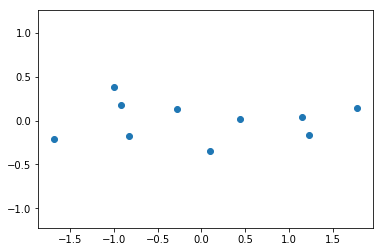

In [19]:
plt.scatter([new_data_with_changed_basis[0,:]],[new_data_with_changed_basis[1,:]])
plt.axis('equal')

#### PLOT D

We plot the same data using the eigen vectors as the basis vectors(shown in plot above).This is similar tilting your head  and watching plot C , imagining the red and yellow lines as the X and Y axis respectively

This plot is basically the original data, rotated so that the
eigenvectors are the axes.


Notice that the X and Y axis are not covarient anymore.

In the figure above, x co-ordinates of the points represent the data quite well.


## Now there is no covariance between X and Y because The non-diagonal values are zero

In [29]:

np.cov(new_data_with_changed_basis)

array([[  1.28402771e+00,  -5.55111512e-17],
       [ -5.55111512e-17,   4.90833989e-02]])

## Why change the basis to Eigen Vectors?

We first got the covariance matrix of the original data.Looking at the covariance matrix we notice that there is co-relation between the X and Y variables(non-diagonal elements being non-zero)

What we want to do is to change the co-ordinate system in such a way that there is no-corelation, and the covariance matrix is a diagonal matrix.

Turns out, when we represent the data with the eigen vectors (of the original covariance matrix) as the basis vectors,the new covariance matrix is a diagonal matrix. (**We use eigen vectors to make non-diagonal matrices, diagonal**)

## Why represent data such that there is no corelation between the two variables?

After doing the things mentioned above we finally have no corelation between the two variables.

We can easily see which basis axis (aka most significant eigen vector) captures the maximum variance in the data(X axis in our case)

In [22]:
compressed_data = new_data_with_changed_basis[0,:]
compressed_data = compressed_data.reshape(10,1)

The 2-D are points are now represented in 1-D.The 1-D co-ordinates are shown below(These are just the X co-ordinates of Plot D above)

We take the values of the axis for which the variance is very high.X-axis in this case. We throw away the Y co-ordinates.(Which leads to a little loss of information)

In [23]:
compressed_data

matrix([[-0.82797019],
        [ 1.77758033],
        [-0.99219749],
        [-0.27421042],
        [-1.67580142],
        [-0.9129491 ],
        [ 0.09910944],
        [ 1.14457216],
        [ 0.43804614],
        [ 1.22382056]])

#### The values shown above are the compressed data.We have represented 2-D data in 1-D

## Restoring the original data from the compressed data.(With some loss of information)

In [27]:
#we multiply the compressed 1-d Co-ordinates by the most significant eigen-vector 

retrieved_data=np.matmul(compressed_data,evecs[:,0].T) + np.array([mean_x,mean_y])

#to get the actual original data back, we need to add on the mean 
#of that original data which we subtracted at at the start

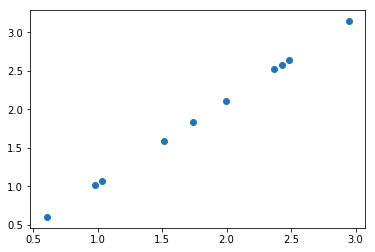

In [28]:
plt.scatter([retrieved_data[:,0]],[retrieved_data[:,1]])